#### Q-1 Select a dataset or datasets of your choice. 
- Apply Cross-validation for parameter tuning, model selection, & feature selection like “cross_validation.ipynb”.

source: http://archive.ics.uci.edu/ml/datasets/ISTANBUL+STOCK+EXCHANGE

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

% matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
pd.set_option('display.max_columns', 100)

In [3]:
df3 = pd.read_csv('Payment_and_value_of_care_-_Hospital.csv', index_col=0)
df3 = df3[df3.Payment != "Not Available"]
df3['Value of care category'] = df3['Value of care category'].str.split(' and ').str[0]
df3 = df3[df3['Value of care category'] != "Not Available"].reset_index()

# only doing mortality
df3 = df3[df3['Value of care category'].str.contains('mortality')]
df3['Payment measure name'] = df3['Payment measure name'].str.split(' ').str[2:-1].str.join(' ')

order_care = ['Worse mortality','Average mortality','Better mortality']

In [4]:
df3.sample()

,Payment measure name,Payment,Value of care category
1166,heart attack,"$22,345",Average mortality


In [5]:
#df3['Payment category'] = pd.Categorical(df4['Payment category'],ordered=True,categories=order_payment)
df3['Payment catcode'] = (df3['Payment'].replace( '[\$,)]','', regex=True )).astype(float)/10000
df3['Value of care category'] = pd.Categorical(df3['Value of care category'],ordered=True,categories=order_care)
df3['Value of care catcode'] = df3['Value of care category'].cat.codes

In [6]:
df3.sample()

,Payment measure name,Payment,Value of care category,Payment catcode,Value of care catcode
357,pneumonia,"$16,632",Worse mortality,1.6632,0


In [7]:
feature_cols = ['Payment catcode','Value of care catcode']
X = df3[feature_cols]
y = df3['Payment measure name']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

0.615789473684


In [8]:
from sklearn.cross_validation import KFold
df3.shape

/Users/dee/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(9879, 5)

In [9]:
kf = KFold(9879, n_folds=10)

In [10]:
n=0
knn = KNeighborsClassifier(n_neighbors=5)
for train_index, test_index in kf:
    knn.fit(df3.iloc[train_index,-2:], df3.iloc[train_index,0])
    y_pred = knn.predict(df3.iloc[test_index,-2:])
    print(metrics.accuracy_score(df3.iloc[test_index,0], y_pred))
    n=n+(metrics.accuracy_score(df3.iloc[test_index,0], y_pred))
print('mean: ', n/10)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

0.622469635628


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

0.637651821862


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

0.647773279352


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

0.623481781377


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

0.622469635628


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

0.654858299595


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

0.57995951417


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

0.631578947368


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

0.612348178138


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

0.623100303951
mean:  0.625569139707


In [11]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()
print(scores)

0.623239973912


### parameter tuning

In [12]:
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()
    k_scores.append(scores)
print(k_scores)

[0.60957364770354694, 0.60775434904774217, 0.62000141515819007, 0.62070960953939669, 0.62323997391186636, 0.62546628436885998, 0.63589282125116386, 0.63963724778394437, 0.64621660534314507, 0.64652168473557059, 0.64793807349798382, 0.64905133127417569, 0.65026631636374066, 0.65097553622189674, 0.64723080204603156, 0.6507739274536587, 0.65087432164699799, 0.65198839980474921, 0.6550242217655432, 0.65502432431323809, 0.65694791397478958, 0.65654315822288956, 0.65735266972668982, 0.6585679624593398, 0.65897251311585014, 0.66271888805483437, 0.66190947909872877, 0.66494540360721766, 0.6633264831473118, 0.66656463171020841]


In [13]:
# best score
max(k_scores)

0.66656463171020841

Text(0.5,0,'Value of K for KNN')

Text(0,0.5,'Cross-Validated Accuracy')

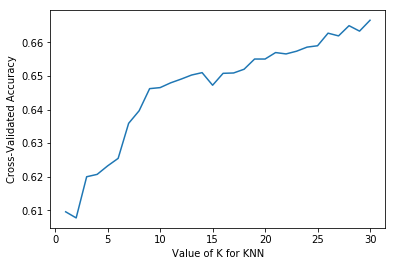

In [14]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

### model selection

In [15]:
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.655024324313


In [16]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.660694596557


### feature selection

In [17]:
from sklearn.linear_model import LinearRegression
df2 = pd.read_csv('data_akbilgic.csv', index_col=0)
X = df2.loc[:,'SP':]
y = df2.ISE

lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
print(scores)

[ -2.37069212e-04  -2.09674217e-04  -1.69596589e-04  -1.56671904e-04
  -1.47380741e-04  -1.45749724e-04  -9.31754211e-05  -4.97198607e-05
  -1.21922214e-04  -1.10903263e-04]


In [18]:
df2.columns

Index(['ISE', 'ISE.1', 'SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM'], dtype='object')

In [19]:
mse_scores = -scores
print(mse_scores)

[  2.37069212e-04   2.09674217e-04   1.69596589e-04   1.56671904e-04
   1.47380741e-04   1.45749724e-04   9.31754211e-05   4.97198607e-05
   1.21922214e-04   1.10903263e-04]


In [20]:
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[ 0.01539705  0.01448013  0.01302293  0.01251686  0.01214005  0.01207269
  0.00965274  0.00705123  0.01104184  0.01053106]


In [21]:
print(rmse_scores.mean())

0.0117906580039


In [22]:
# omitting SP column
X1 = df2.loc[:,'DAX':]

In [23]:
print(np.sqrt(-cross_val_score(lm, X1, y, cv=10, scoring='neg_mean_squared_error')).mean())

0.0117683647862
